In [2]:
"""
Tutorial: Binary Black Hole Mergers in the Galactic Nucleus (GN)
==============================================================================

This script demonstrates the full workflow for analyzing Fly-by Induced
Binary Black Hole (BBH) mergers in the Galactic Nucleus (GN).

It covers:
1. Initialize the simulation library (handled automatically by GN_BBH).
2. Sample merger eccentricities (e.g., for LIGO rate estimation).
3. Analyze the underlying "Progenitor Population" (systems destined to merge).
4. Generate "Snapshots" of the current GN BBH population for LISA analysis.

Prerequisites:
- The folder 'GN_modeling' must be in the current directory.
- 'GN_modeling' must contain 'GN_BBH.py'.
- The 'data' folder (containing .npy files) should be where GN_BBH expects it
  (usually the current working directory).
==============================================================================
"""

import numpy as np
import scipy.constants as sciconsts

# Importing the core module
# This will automatically initialize the internal data manager
try:
    from GN_modeling import GN_BBH
    print("Successfully imported GN_BBH module.")
except ImportError:
    print("Error: Could not import 'GN_modeling.GN_BBH'.")
    print("Please ensure the 'GN_modeling' folder is in the current directory.")
    exit()

# ==============================================================================
# SECTION 0: Initialization
# ==============================================================================
# The module loads the evolution history data automatically upon import.
# No manual data loading is required here.

print("\n=== STEP 0: Simulation Library Initialization ===")
print("GN_BBH module loaded. Data manager initialized internally.")

[GN_BBH] Loading data from /content/LISAeccentric/GN_modeling/data/evolution_history.npy...
[GN_BBH] Loaded 766 systems.
[YNC_BBH] Loading data from /content/LISAeccentric/GN_modeling/data/evolution_history_YNC.npy...
[YNC_BBH] Loaded 1216 systems.
Successfully imported GN_BBH module.

=== STEP 0: Simulation Library Initialization ===
GN_BBH module loaded. Data manager initialized internally.



=== FEATURE 1: Sampling Merger Eccentricities ===
Sampling 5000 systems based on weighted merger rates...
Sample Mean e (at 10Hz): 4.9458e-05
Example output (first 3): [1.8e-04 0.0e+00 1.0e-05]
Displaying Eccentricity CDF plot...


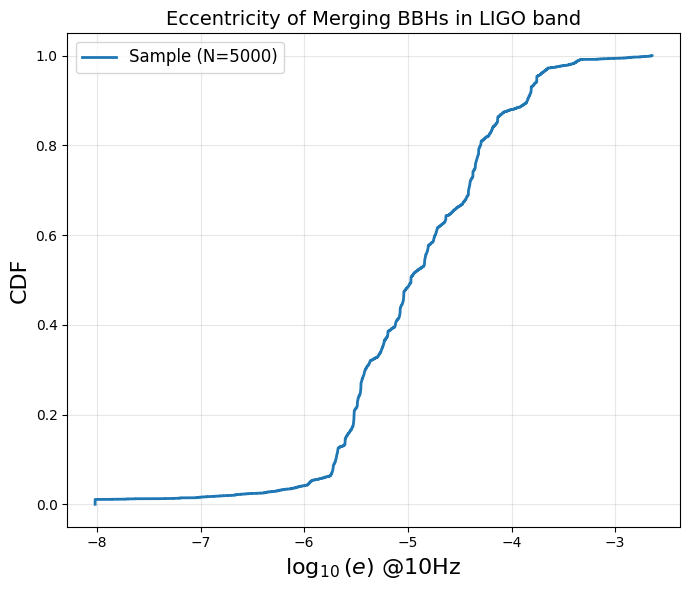

In [3]:
# ==============================================================================
# FEATURE 1: Merger Eccentricity Sampling (LIGO Band)
# ==============================================================================
# Function: Randomly sample N merger eccentricities from the simulated library.
# GN mergers retain significant eccentricity when entering the LIGO band (10Hz).

print("\n=== FEATURE 1: Sampling Merger Eccentricities ===")
N_samples = 5000
print(f"Sampling {N_samples} systems based on weighted merger rates...")

# Call the API to generate samples
e_samples = GN_BBH.generate_random_merger_eccentricities(n=N_samples)

if len(e_samples) > 0:
    print(f'Sample Mean e (at 10Hz): {np.mean(e_samples):.4e}')
    print('Example output (first 3):', np.round(e_samples[:3], 5))

    # Plot Cumulative Distribution Function (CDF)
    print("Displaying Eccentricity CDF plot...")
    # This will automatically pop up the plot window
    GN_BBH.plot_ecc_cdf_log(e_list=e_samples)
else:
    print("[Warning] No samples generated. Please check if data files are empty.")

In [4]:
# ==============================================================================
# FEATURE 2: Accessing Progenitor Population (Library Analysis)
# ==============================================================================
# Access the underlying simulated progenitor population.
# These are the detailed parameters of systems that successfully merged.

print("\n=== FEATURE 2: Analyzing Underlying Merger Progenitors ===")
N_inspect = 3
print(f"Extracting details for {N_inspect} random merger events...")

progenitors = GN_BBH.get_random_merger_systems(n=N_inspect)

for i, sys in enumerate(progenitors):
    print(f" [System {i+1}] ID: {sys['id']}")
    print(f"    - Masses: {sys['m1']:.1f} + {sys['m2']:.1f} M_sun")
    print(f"    - Initial Orbit: a = {sys['a_initial']:.1f} AU, e = {sys['e_initial']:.4f}")
    print(f"    - Merger Time:   {sys['t_final_actual']:.2e} years")



=== FEATURE 2: Analyzing Underlying Merger Progenitors ===
Extracting details for 3 random merger events...
 [System 1] ID: 722
    - Masses: 71.0 + 8.2 M_sun
    - Initial Orbit: a = 0.3 AU, e = 0.9966
    - Merger Time:   2.71e+03 years
 [System 2] ID: 1120
    - Masses: 84.9 + 87.1 M_sun
    - Initial Orbit: a = 0.2 AU, e = 0.9736
    - Merger Time:   2.16e+04 years
 [System 3] ID: 686
    - Masses: 7.4 + 36.6 M_sun
    - Initial Orbit: a = 0.1 AU, e = 0.9310
    - Merger Time:   4.29e+06 years



=== FEATURE 3.1: Steady State GN Snapshot ===
Generating snapshot for Rate = 3.0/Myr...
[Snapshot-GN] Simulating 8819.55 Myr history with rate 3.0/Myr.
[Snapshot-GN] Generating ~26458 systems...
[Snapshot-GN] Found 2654 alive systems at t=0.


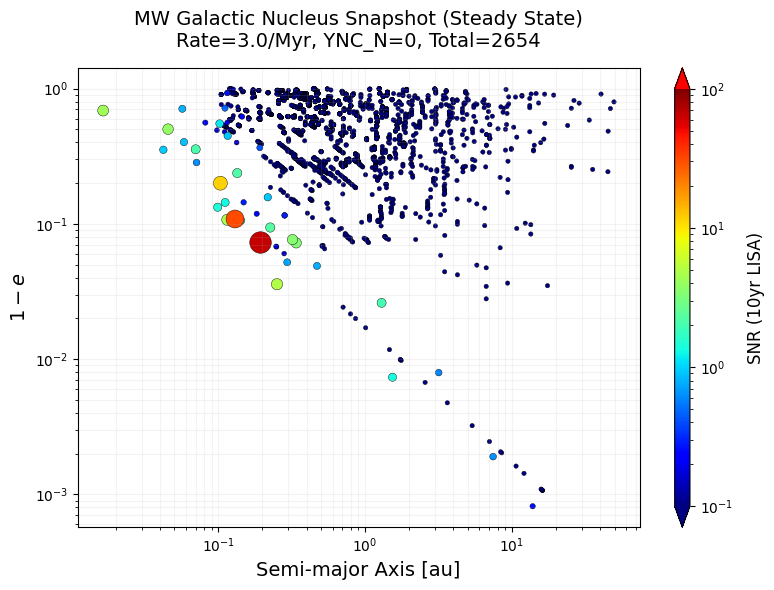


=== FEATURE 3.2: Young Nuclear Cluster (YNC) Snapshot ===
Generating snapshot for YNC: Age = 5.0 Myr, N = 500...
[Snapshot-YNC] Sampling 500 systems at Age T=5.00 Myr...
[Snapshot-YNC] Found 497 alive systems at Age T=5000000.0.


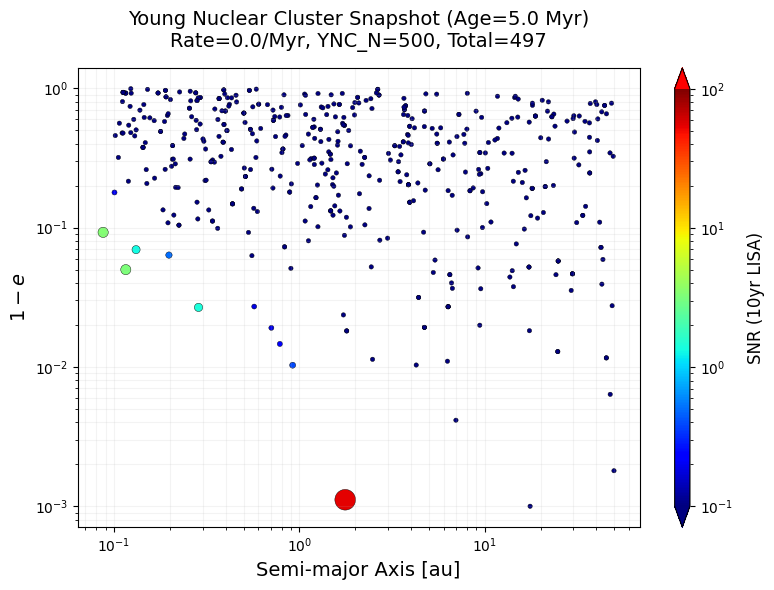


=== FEATURE 3.3: Mixed Population (GN + YNC) ===
Generating combined snapshot...
[Snapshot-GN] Simulating 8819.55 Myr history with rate 2.0/Myr.
[Snapshot-GN] Generating ~17639 systems...
[Snapshot-GN] Found 1788 alive systems at t=0.
[Snapshot-YNC] Sampling 200 systems at Age T=4.00 Myr...
[Snapshot-YNC] Found 200 alive systems at Age T=4000000.0.


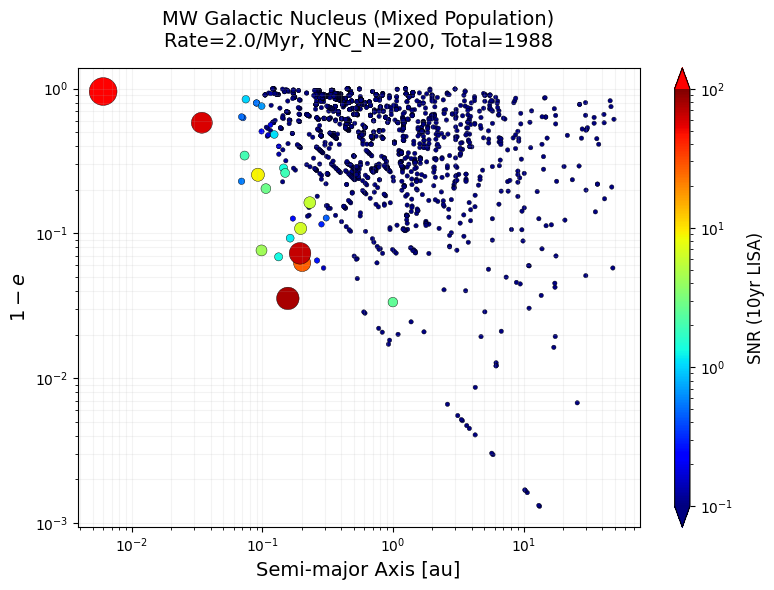

In [5]:
# ==============================================================================
# FEATURE 3: Snapshot Generation (LISA Band / Current State)
# ==============================================================================
# Generate a "snapshot" containing BBH systems that currently exist in the GN.
# These systems are evolving under the SMBH potential and may be visible to LISA.

# --- 3.1: Steady State GN (Relaxed Population) ---
# Simulates the background population assuming a constant formation rate.
print("\n=== FEATURE 3.1: Steady State GN Snapshot ===")
rate_gn = 3.0  # Formation rate: 3 systems per Myr
print(f"Generating snapshot for Rate = {rate_gn}/Myr...")

# This will automatically pop up the plot window
GN_BBH.generate_and_plot_snapshot(
    Gamma_rep=rate_gn,
    ync_age=None,
    ync_count=0,
    title="MW Galactic Nucleus Snapshot (Steady State)"
)

# --- 3.2: Young Nuclear Cluster (YNC) Event ---
# Simulates a specific "Starburst" event that happened T years ago.
print("\n=== FEATURE 3.2: Young Nuclear Cluster (YNC) Snapshot ===")
age_ync = 5.0e6   # The cluster is 5 Myr old (5e6 years)
N_ync_sys = 500   # 500 massive BBHs formed in this cluster

print(f"Generating snapshot for YNC: Age = {age_ync/1e6} Myr, N = {N_ync_sys}...")

# This will automatically pop up the plot window
GN_BBH.generate_and_plot_snapshot(
    Gamma_rep=0.0,   # Turn off background to isolate YNC
    ync_age=age_ync,
    ync_count=N_ync_sys,
    title=f"Young Nuclear Cluster Snapshot (Age={age_ync/1e6} Myr)"
)

# --- 3.3: Mixed Population (Realistic MW Center) ---
# Combines the steady background with a recent starburst event.
print("\n=== FEATURE 3.3: Mixed Population (GN + YNC) ===")
print("Generating combined snapshot...")

# This will automatically pop up the plot window
GN_BBH.generate_and_plot_snapshot(
    Gamma_rep=2.0,      # Background rate
    ync_age=4.0e6,      # A 4 Myr old cluster
    ync_count=200,      # 200 systems from the cluster
    title="MW Galactic Nucleus (Mixed Population)"
)